In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]
iso_encoding = 'ISO-8859-1'

In [3]:
def read_sheet(sheet_name):
    df = pd.read_csv(f'school-completion-rates-nov-2019-{sheet_name}.csv', encoding=iso_encoding)
    df.columns = df.iloc[1]
    string_columns = list(filter(lambda x: isinstance(x, str),  df.columns.tolist()))
    df = df[string_columns]
    df = df.iloc[2:]
    df.columns = map(str.strip, df.columns)
    df.columns = map(str.lower, df.columns)
    df = df.reset_index(drop=True)

    return df

In [4]:
def clean_after_clear_row(df, column_name):
    _df = df.copy()
    _first_invald_row, *_ = _df[_df[column_name].isnull()].index.tolist()
    _df = _df[:_first_invald_row]

    return _df

In [5]:
df_primary = read_sheet('primary')
df_secondary = clean_after_clear_row(df_primary, 'country')
df_secondary[199:209]


,iso_code,country,region,sub-region,least developed countries (ldc),africa sub-regions,africa region,total,male,female,urban,rural,poorest,second,middle,fourth,richest,source,"total population, one year before primary"
199,YEM,Yemen,MENA,NaN,LDC,NaN,NaN,63,70,55,79,56,33,53,66,74,86,DHS 2013,"4,383,983"
200,ZMB,Zambia,SSA,ESA,LDC,Southern Africa,All,74,73,75,88,62,43,62,69,84,94,DHS 2013-14,"3,363,211"
201,ZWE,Zimbabwe,SSA,ESA,NaN,Southern Africa,All,88,87,89,97,85,74,82,89,93,98,DHS 2015,"3,119,270"


<AxesSubplot:>

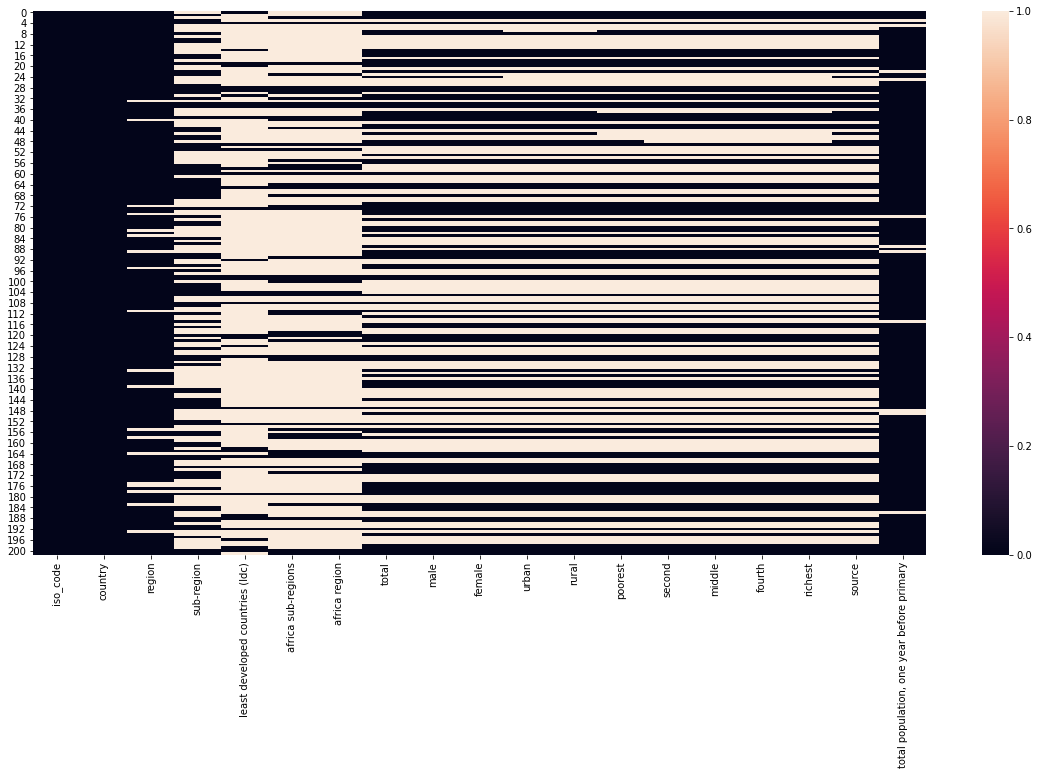

In [6]:
sns.heatmap(df_secondary.isna())


In [7]:
with open('../iso_country_codes/iso_country_codes.json', encoding=iso_encoding) as fp:
    iso_country_dic = dict( json.load(fp))

In [8]:
def get_countries_not_included(countries_list, country_dic=iso_country_dic):
    not_included_countries = []
    for c in countries_list:
        if isinstance(c, str) == False:
            print('{} is wrong type: {}'.format(c, type(c)))
        else:
            if (c.lower() not in country_dic):
                not_included_countries.append(c)
    return not_included_countries

In [9]:
# df_secondary['modified_country_name'] = df_secondary['country'].str.strip().str.lower()
# missing_countries = get_countries_not_included(df_secondary['modified_country_name'].unique().tolist())
missing_countries = get_countries_not_included(df_secondary['country'].unique().tolist())
missing_countries

['Bolivia (Plurinational State of)',
 'Cabo Verde',
 "CÃ´te d'Ivoire",
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Palau',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Slovakia',
 'State of Palestine',
 'Eswatini',
 'Syrian Arab Republic',
 'Tajikistan',
 'Venezuela (Bolivarian Republic of)']

### Missing Countries

```.json
[
    'Bolivia (Plurinational State of)',
    'Cabo Verde',
    "Côte d'Ivoire",
    'Czechia',
    "Democratic People's Republic of Korea",
    'Democratic Republic of the Congo',
    'Iran (Islamic Republic of)',
    'Kyrgyzstan',
    "Lao People's Democratic Republic",
    'Micronesia (Federated States of)',
    'Palau',
    'Republic of Korea',
    'Republic of Moldova',
    'Russian Federation',
    'Slovakia',
    'State of Palestine',
    'Eswatini',
    'Syrian Arab Republic',
    'Tajikistan',
    'Venezuela (Bolivarian Republic of)',
]
```

In [10]:
_missing_countries_dir = {
    'Bolivia (Plurinational State of)': iso_country_dic['bolivia'],
    'Cabo Verde': iso_country_dic['cape verde'],
    # 'Côte d\'Ivoire': iso_country_dic["côte d'ivoire"],
    'Côte d\'Ivoire': 'CIV',
    'CÃ´te d\'Ivoire': 'CIV',
    'Czechia': iso_country_dic['czech republic'],
    "Democratic People's Republic of Korea": iso_country_dic['north korea'],
    'Democratic Republic of the Congo': iso_country_dic['congo'],
    'Iran (Islamic Republic of)': iso_country_dic['iran'],
    'Kyrgyzstan': iso_country_dic['kirghizistan'],
    "Lao People's Democratic Republic": iso_country_dic['laos'],
    'Micronesia (Federated States of)': iso_country_dic['micronesia, federated states of'],
    'Palau': iso_country_dic['pacific islands (palau)'],
    'Republic of Korea': iso_country_dic['korea'],
    'Republic of Moldova': iso_country_dic['moldova'],
    'Russian Federation': iso_country_dic['russia'],
    'Slovakia': iso_country_dic['slovak republic'],
    'State of Palestine': iso_country_dic['occupied palestinian territory'],
    'Eswatini': iso_country_dic['swaziland'],
    'Syrian Arab Republic': iso_country_dic['syria'],
    'Tajikistan': iso_country_dic['tadjikistan'],
    # 'Turkmenistan': iso_country_dic['turkmenistan'],
    'Venezuela (Bolivarian Republic of)' : iso_country_dic['venezuela'],
}

missing_countries_dir = {k.lower(): v for k, v in _missing_countries_dir.items()}

<AxesSubplot:>

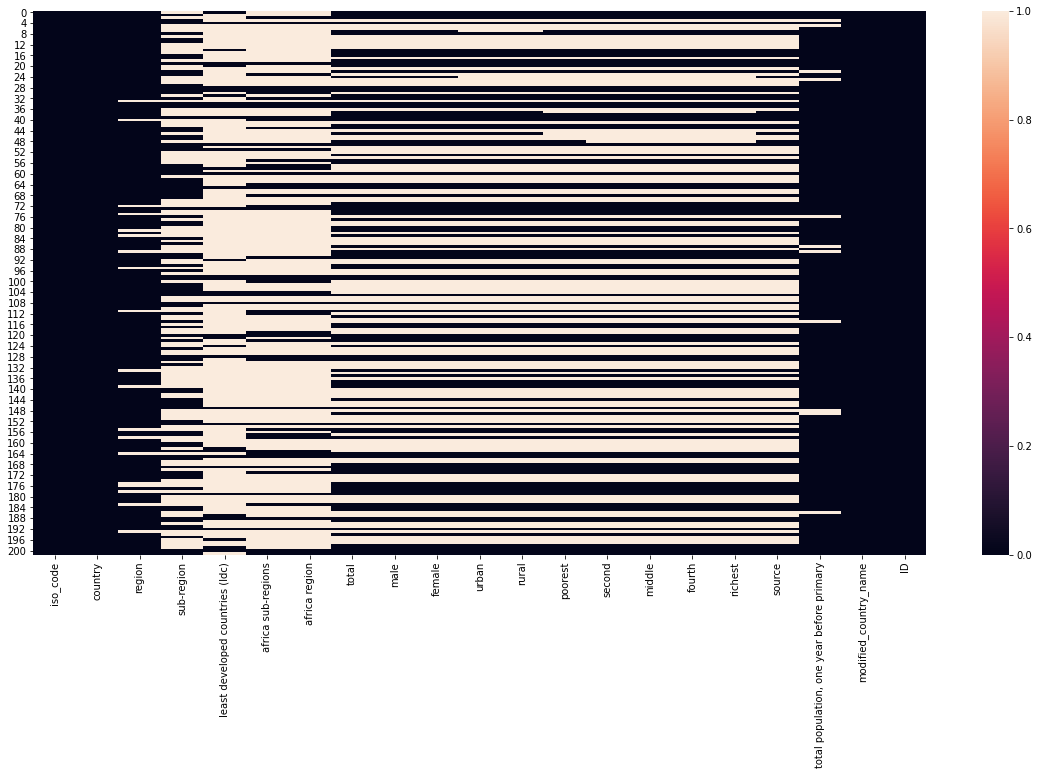

In [11]:
wholesome_countries_dir = missing_countries_dir | iso_country_dic 

df_tertiary = df_secondary.copy()
df_tertiary['modified_country_name'] = df_tertiary['country']
df_tertiary['ID'] = df_tertiary['modified_country_name'].str.lower().str.strip().map(wholesome_countries_dir)

sns.heatmap(df_tertiary.isna())


In [12]:
second_missing_countries = get_countries_not_included(df_tertiary['modified_country_name'].unique().tolist(), wholesome_countries_dir)
second_missing_countries # []

[]

In [13]:
df_tertiary.columns.to_list()

['iso_code',
 'country',
 'region',
 'sub-region',
 'least developed countries (ldc)',
 'africa sub-regions',
 'africa region',
 'total',
 'male',
 'female',
 'urban',
 'rural',
 'poorest',
 'second',
 'middle',
 'fourth',
 'richest',
 'source',
 'total population, one year before primary',
 'modified_country_name',
 'ID']

In [14]:
key_variables = [
    'country',
    'total',
    'male',
    'female',
    'urban',
    'rural',
    'poorest',
    'second',
    'middle',
    'fourth',
    'richest',
    'source',
    'total population, one year before primary',
    'ID',
 ]

In [15]:
def save_dataframe(df, sheet_name):
    df.to_csv(f'clean-school-completion-rates-nov-2019-{sheet_name}.csv', encoding=iso_encoding, index=False)

In [16]:
# df_tertiary[key_variables].to_csv('')
save_dataframe(df_tertiary[key_variables], 'primary')